# handling missing values

- Removing the columns having missing values — If you have a column with more than 80% missing values, then it is better to drop the column.
- Removing the rows having missing values — If you have a small percentage of rows with missing values, then you can just drop those rows.
- Imputing the missing values — This is usually the preferred way of handling the missing values, especially where the missing values are not more than 80%.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Melbourne_housing.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.shape

(34857, 21)

- rows=> 34857
- columns=> 21

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Functions for checking missing values
- The isnull() function is used for checking the missing values.
- The result is usually boolean values of True and False.
- Missing values get mapped to True
- Non-missing values get mapped to False

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

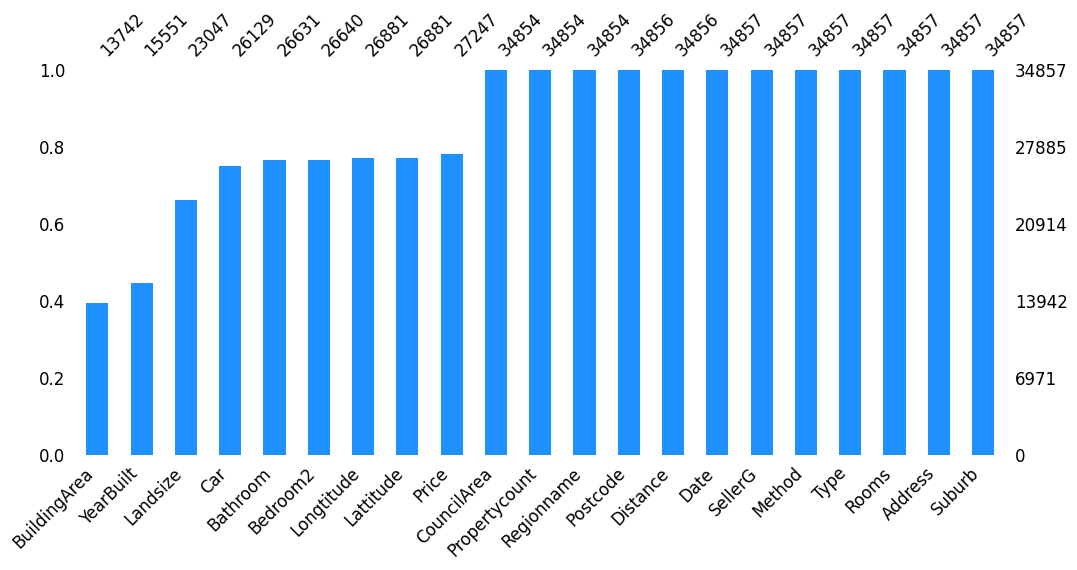

In [7]:
#missing values by bar graph
import missingno
missingno.bar(df, color='dodgerblue', sort='ascending', figsize=(12,5),fontsize=12);

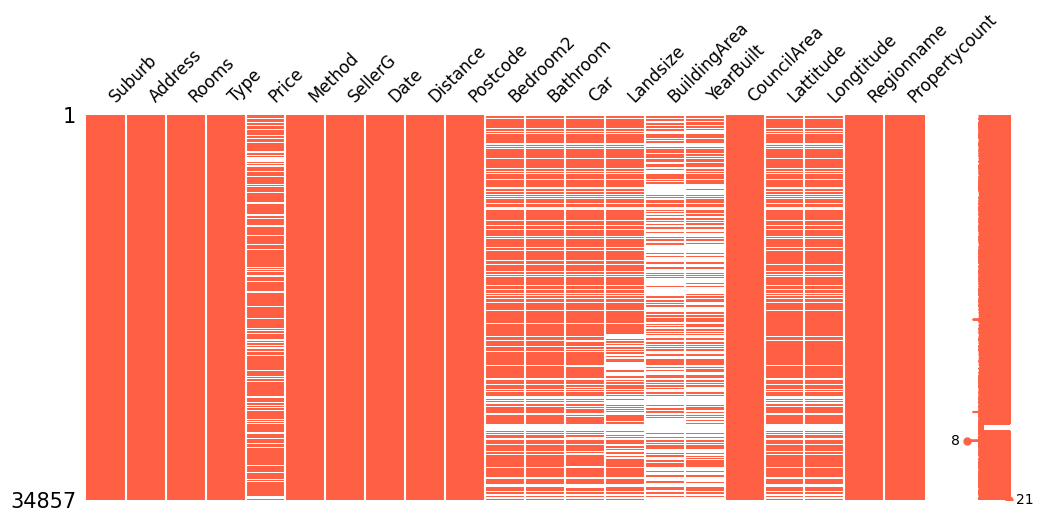

In [8]:
#missing values by matrix white space shows missing value
import missingno
missingno.matrix(df, color=(1,0.38,0.27),figsize=(12,5),fontsize=12);

#  1. Deleting Rows with missing Data

If the record contains a few missing values, we can drop all the rows having any missing values.

In [9]:
df1=df.dropna(axis=0)

In [10]:
df1.shape

(8887, 21)

<div class="alert alert-block alert-info">
<b>NOTE:</b>You can see the result above has deleted a lot of rows and hence , this is not the best way to handle our missing values in this dataset
</div>


# 2. Deleting Columns with missing Data

In [11]:
# dropping all columns with missing values by specifying axis=1(Not the best option)
df2=df.dropna(axis=1)

In [12]:
df2.isnull().sum()

Suburb     0
Address    0
Rooms      0
Type       0
Method     0
SellerG    0
Date       0
dtype: int64

In [13]:
df2.shape

(34857, 7)

<div class="alert alert-block alert-info">
<b>NOTE:</b>You can see the result above has deleted 14 columns and hence , this is not the best way to handle our missing values in this dataset
</div>

## dropping columns by specifying threshold

Calculating the percentage of values is usually

Percentage= (Value / Total Value)×100

- value = df.isnull().sum()
- total value = len(df)

In [14]:
percentage_missing = df.isnull().sum()/len(df)*100

In [15]:
#it will print the percentage of null values in columns
percentage_missing

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [16]:
#so we will drop the columns having null is grether than 55%
to_drop =percentage_missing[percentage_missing>55].keys()

In [17]:
#these two columns having null value greather than 55%
to_drop

Index(['BuildingArea', 'YearBuilt'], dtype='object')

In [18]:
 df.drop(to_drop, axis=1,inplace=True)

In [19]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [20]:
#two columns are drop from data
df.shape

(34857, 19)

BuildingArea and YearBuilt have been dropped

# 3. Replacing Missing Data with mean, mode or median using fillna function

- Mean - The average value
- Mode - The most common value
- Median - The mid point value

>>we can fill value in null columns

In [21]:
# Replace missing values in Price with Mean
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [22]:
# Replace missing values in Bedroom2 with Mode
df['Bedroom2'].fillna(df['Bedroom2'].mode()[0],inplace=True)

In [23]:
# Replace missing values in Car with Median
df['Car'].fillna(df['Car'].median(),inplace=True)

In [24]:
# specifying a value directly
df['Propertycount'].fillna(value=0,inplace=True)

In [25]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom          8226
Car                  0
Landsize         11810
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        0
dtype: int64

# 4. Replacing Missing values using Sklearn Impute(Categorical data)

In [26]:
from sklearn.impute import SimpleImputer
import numpy as np

<div class="alert alert-block alert-info">
<b>NOTE: </b>if the below code give value error then run your code in "google colab"
</div>


In [27]:
# replacing missing values for region with the most frequent value

imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df['Regionname']= imp_mode.fit_transform(df[['Regionname']])

In [28]:
# replacing missing values in councilarea with value other


imp_mode = SimpleImputer(strategy='constant', fill_value='other')


df['CouncilArea']= imp_mode.fit_transform(df[['CouncilArea']])



In [29]:
# confirm 'other' has been filled for missing values
df['CouncilArea'].value_counts(ascending=True)

other                                3
Moorabool Shire Council              7
Mitchell Shire Council              20
Cardinia Shire Council              41
Macedon Ranges Shire Council        46
Nillumbik Shire Council             88
Yarra Ranges Shire Council         102
Casey City Council                 176
Frankston City Council             290
Melton City Council                292
Greater Dandenong City Council     314
Knox City Council                  371
Maroondah City Council             506
Whitehorse City Council            618
Wyndham City Council               624
Whittlesea City Council            828
Kingston City Council              871
Hobsons Bay City Council           942
Manningham City Council           1046
Yarra City Council                1186
Hume City Council                 1214
Port Phillip City Council         1280
Maribyrnong City Council          1451
Stonnington City Council          1460
Monash City Council               1466
Brimbank City Council    